# Final Project Group 4

In [74]:
#Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import warnings
warnings.filterwarnings('ignore')

# For Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

# For Feature Scaling
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler

# For Principal Component Analysis
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [4]:
df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            866007
total_rev_hi_lim     70276
inq_fi              866007
total_cu_tl         866007
inq_last_12m        866007
Length: 74, dtype: int64

annual_inc_joint, dti_joint, verification_status_joint has very low entry, thus cannot be used.

annual_inc_joint - The combined self-reported annual income provided by the co-borrowers during registration

dti_joint - A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income

verification_status_joint - Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified

In [5]:
df.drop(columns=['annual_inc_joint', 'dti_joint', 'verification_status_joint'])

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN


In [6]:
df.duplicated().sum()

0

In [7]:
df['acc_now_delinq'].unique()

array([ 0.,  1., nan,  2.,  3.,  5.,  4.,  6., 14.])

Picking out features deemed necessary 

In [8]:
df_risk = df[['loan_amnt', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'collections_12_mths_ex_med', 'tot_cur_bal', 'total_rev_hi_lim']]

In [9]:
df_risk

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,collections_12_mths_ex_med,tot_cur_bal,total_rev_hi_lim
0,5000.0,10.65,162.87,B,10+ years,RENT,24000.0,Verified,credit_card,27.65,...,1.0,3.0,0.0,13648.0,83.7,9.0,0.00,0.0,NaN,NaN
1,2500.0,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,car,1.00,...,5.0,3.0,0.0,1687.0,9.4,4.0,0.00,0.0,NaN,NaN
2,2400.0,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,small_business,8.72,...,2.0,2.0,0.0,2956.0,98.5,10.0,0.00,0.0,NaN,NaN
3,10000.0,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,other,20.00,...,1.0,10.0,0.0,5598.0,21.0,37.0,0.00,0.0,NaN,NaN
4,3000.0,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,other,17.94,...,0.0,15.0,0.0,27783.0,53.9,38.0,766.90,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,10000.0,11.99,332.10,B,8 years,RENT,31000.0,Verified,debt_consolidation,28.69,...,0.0,9.0,1.0,14037.0,82.1,15.0,7055.47,0.0,25274.0,17100.0
887375,24000.0,11.99,797.03,B,10+ years,MORTGAGE,79000.0,Verified,home_improvement,3.90,...,1.0,5.0,0.0,8621.0,84.5,23.0,16933.26,0.0,140285.0,10200.0
887376,13000.0,15.99,316.07,D,5 years,RENT,35000.0,Verified,debt_consolidation,30.90,...,0.0,9.0,1.0,11031.0,61.3,22.0,11155.50,0.0,34178.0,18000.0
887377,12000.0,19.99,317.86,E,1 year,RENT,64400.0,Source Verified,debt_consolidation,27.19,...,2.0,17.0,0.0,8254.0,30.6,20.0,10447.31,1.0,58418.0,27000.0


In [10]:
df_risk.dropna(axis=0,inplace=True)

In [11]:
df_risk.isnull().sum()

loan_amnt                     0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
collections_12_mths_ex_med    0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: int64

Setting phik plot

interval columns not set, guessing: ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'collections_12_mths_ex_med', 'tot_cur_bal', 'total_rev_hi_lim']


<AxesSubplot:>

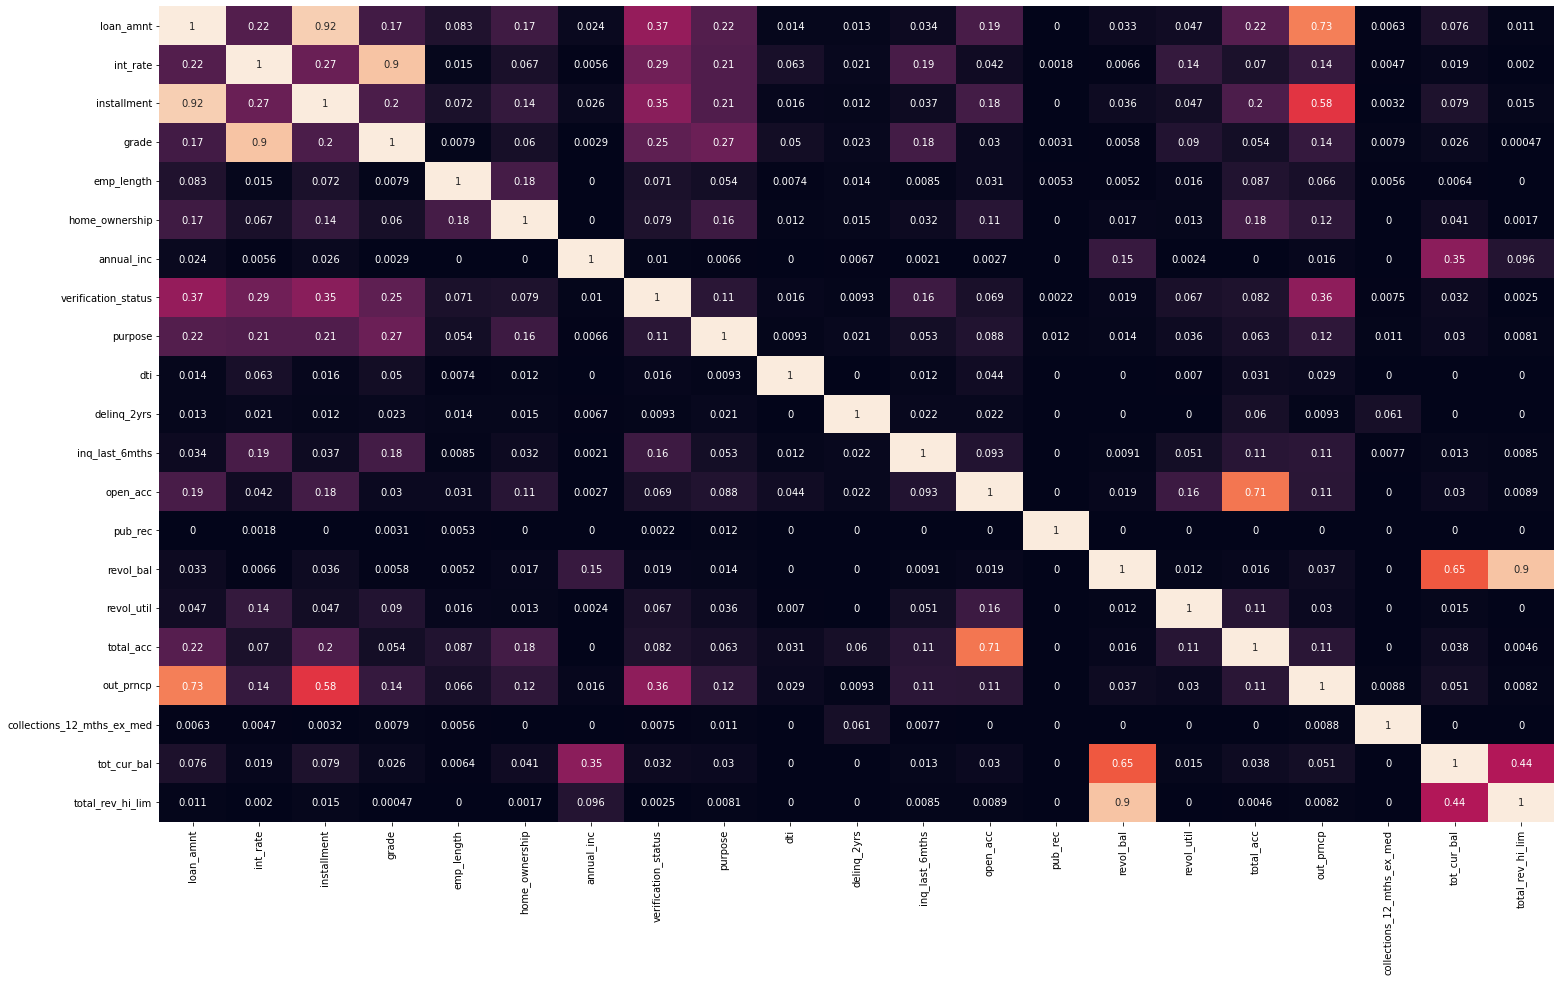

In [12]:
# Feature Correlation
# Setting figure size
fig = plt.figure(figsize = (25, 15))

# Heatmap plotting
sns.heatmap(df_risk.phik_matrix(),
            vmin = 0,
            vmax = 1,
            annot = True,
            cbar = False
)

In [13]:
df_risk['purpose'].unique()

array(['debt_consolidation', 'other', 'credit_card', 'home_improvement',
       'small_business', 'major_purchase', 'house', 'moving', 'medical',
       'car', 'vacation', 'renewable_energy', 'wedding', 'educational'],
      dtype=object)

In [14]:
df_risk2 = df_risk[(df_risk != 'educational')]
df_risk2.dropna(inplace=True)
df_risk2['purpose'].unique()

array(['debt_consolidation', 'other', 'credit_card', 'home_improvement',
       'small_business', 'major_purchase', 'house', 'moving', 'medical',
       'car', 'vacation', 'renewable_energy', 'wedding'], dtype=object)

In [15]:
#creating a copy just in case
df_c = df_risk2.copy()

## Feature Engineering

**Split Data**

In [16]:
train, test = train_test_split(df_risk2, test_size=0.2, random_state=101)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (619173, 21)
Test size:  (154794, 21)


**Data Preprocessing**

In [17]:
#Encoding
#determining the values to encode in order
grade_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
emp_length_categories = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
home_ownership_categories = ['MORTGAGE', 'RENT', 'OWN', 'OTHER', 'NONE', 'ANY']
verification_categories = ['Source Verified', 'Verified', 'Not Verified']
purpose_categories = ['debt_consolidation', 'credit_card', 'home_improvement', 'other', 'major_purchase', 'small_business', 'medical', 'car', 'moving', 'vacation', 'house', 'wedding', 'renewable_energy' ]

In [21]:
#encoding features with ordinal encoder
ordinal_encoder = OrdinalEncoder(categories = [grade_categories,emp_length_categories,home_ownership_categories,verification_categories,purpose_categories])

train1 = ordinal_encoder.fit_transform(train[['grade','emp_length','home_ownership', 'verification_status', 'purpose']])
train_enc = pd.DataFrame(train1, columns=['grade','emp_length','home_ownership', 'verification_status', 'purpose'])
test1 = ordinal_encoder.transform(test[['grade','emp_length','home_ownership', 'verification_status', 'purpose']])
test_enc = pd.DataFrame(test1, columns=['grade','emp_length','home_ownership', 'verification_status', 'purpose'])
train_enc

,grade,emp_length,home_ownership,verification_status,purpose
0,2.0,0.0,1.0,1.0,0.0
1,1.0,7.0,0.0,0.0,1.0
2,2.0,10.0,2.0,2.0,1.0
3,1.0,10.0,0.0,2.0,0.0
4,3.0,4.0,1.0,2.0,0.0
...,...,...,...,...,...
619168,3.0,5.0,0.0,2.0,0.0
619169,1.0,3.0,0.0,1.0,1.0
619170,2.0,10.0,0.0,2.0,1.0
619171,1.0,3.0,1.0,2.0,1.0


**Checking Outliers**

In [23]:
def diagnostic_plots(train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=train[variable])
    plt.title('Boxplot')

    plt.show()

In [24]:
df_risk2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773967 entries, 42535 to 887378
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   773967 non-null  float64
 1   int_rate                    773967 non-null  float64
 2   installment                 773967 non-null  float64
 3   grade                       773967 non-null  object 
 4   emp_length                  773967 non-null  object 
 5   home_ownership              773967 non-null  object 
 6   annual_inc                  773967 non-null  float64
 7   verification_status         773967 non-null  object 
 8   purpose                     773967 non-null  object 
 9   dti                         773967 non-null  float64
 10  delinq_2yrs                 773967 non-null  float64
 11  inq_last_6mths              773967 non-null  float64
 12  open_acc                    773967 non-null  float64
 13  pub_rec   

In [55]:
train_num = train[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'collections_12_mths_ex_med', 'tot_cur_bal', 'total_rev_hi_lim']]
test_num = test[['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'collections_12_mths_ex_med', 'tot_cur_bal', 'total_rev_hi_lim']]
 

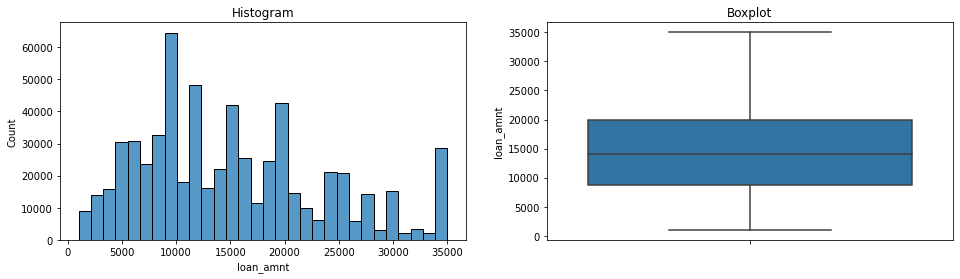

In [25]:
diagnostic_plots(train_num,'loan_amnt')

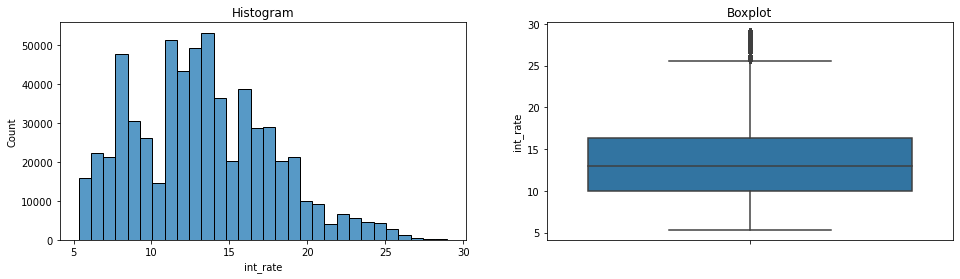

In [26]:
diagnostic_plots(train_num,'int_rate')

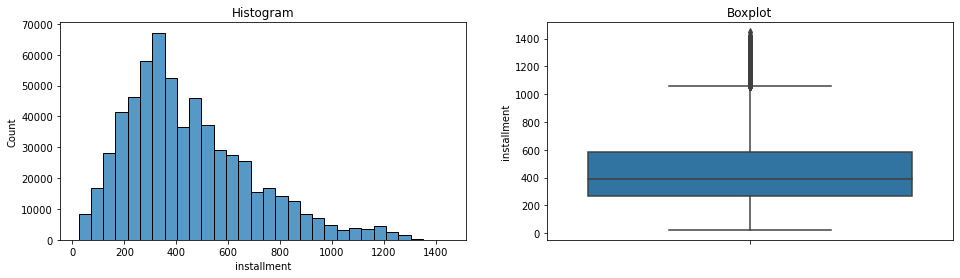

In [27]:
diagnostic_plots(train_num,'installment')

In [34]:
train_num['annual_inc'].describe()

count    6.191730e+05
mean     7.698224e+04
std      6.842262e+04
min      3.800000e+03
25%      4.770000e+04
50%      6.500000e+04
75%      9.100000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

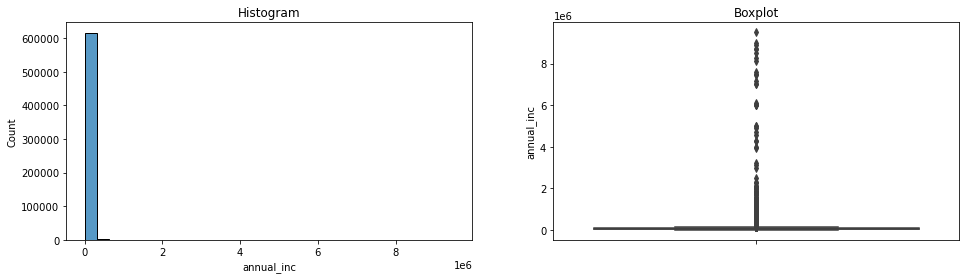

In [28]:
diagnostic_plots(train_num,'annual_inc')

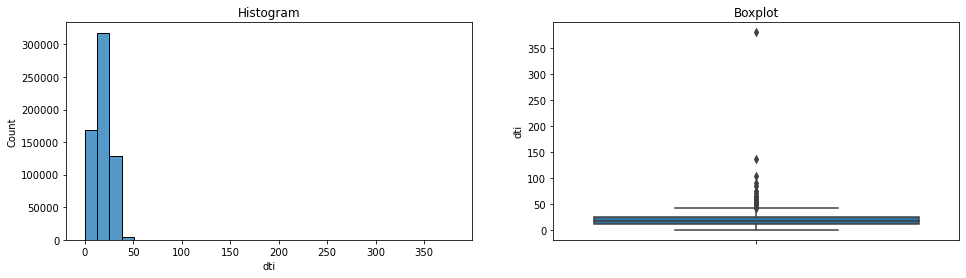

In [35]:
diagnostic_plots(train_num,'dti')

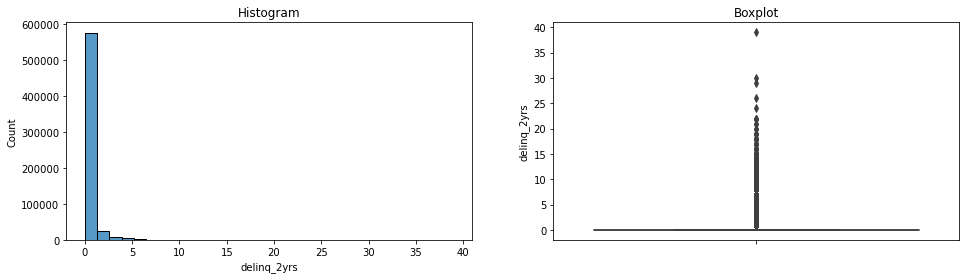

In [36]:
diagnostic_plots(train_num,'delinq_2yrs')

In [38]:
train_num['inq_last_6mths'].value_counts()

0.0    352009
1.0    168190
2.0     63963
3.0     24552
4.0      7264
5.0      2520
6.0       672
7.0         2
8.0         1
Name: inq_last_6mths, dtype: int64

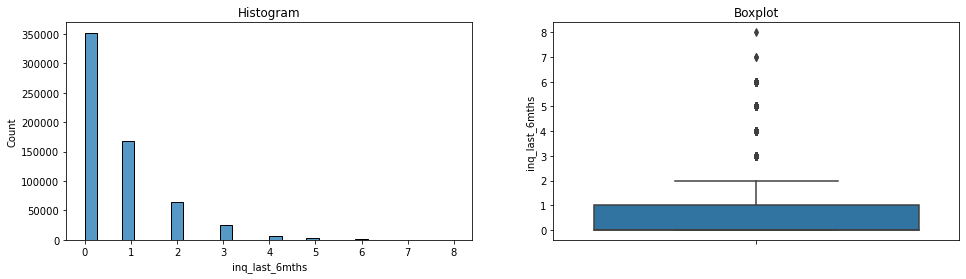

In [37]:
diagnostic_plots(train_num,'inq_last_6mths')

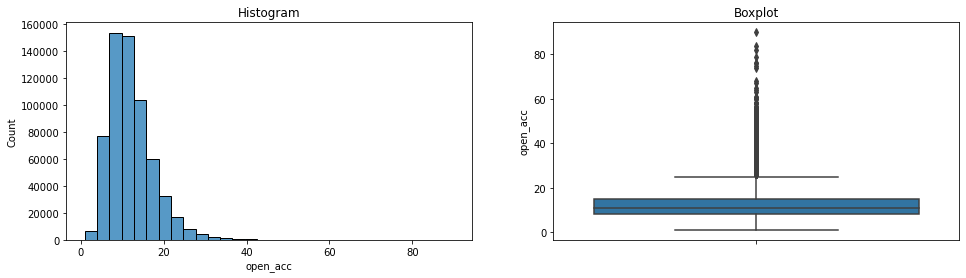

In [39]:
diagnostic_plots(train_num,'open_acc')

In [41]:
train_num['pub_rec'].value_counts()

0.0     521942
1.0      80724
2.0      10890
3.0       3275
4.0       1140
5.0        557
6.0        291
7.0        133
8.0         81
9.0         36
10.0        35
11.0        18
12.0        13
13.0         9
16.0         5
18.0         4
15.0         4
21.0         3
17.0         3
49.0         2
40.0         1
26.0         1
54.0         1
63.0         1
22.0         1
20.0         1
86.0         1
23.0         1
Name: pub_rec, dtype: int64

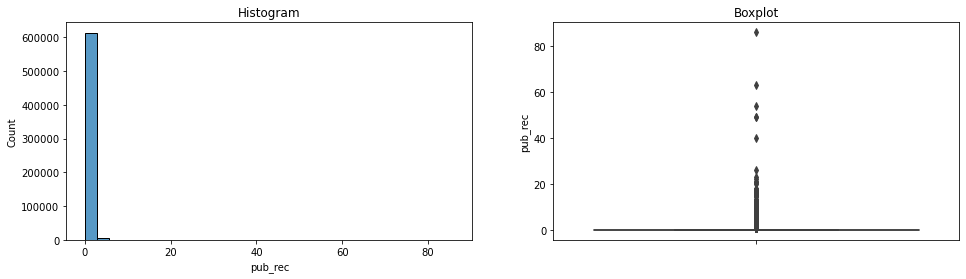

In [40]:
diagnostic_plots(train_num,'pub_rec')

In [43]:
train_num['revol_bal'].value_counts()

0.0         1365
5466.0        55
5235.0        54
5296.0        50
5407.0        50
            ... 
96392.0        1
68695.0        1
194520.0       1
369392.0       1
54733.0        1
Name: revol_bal, Length: 66860, dtype: int64

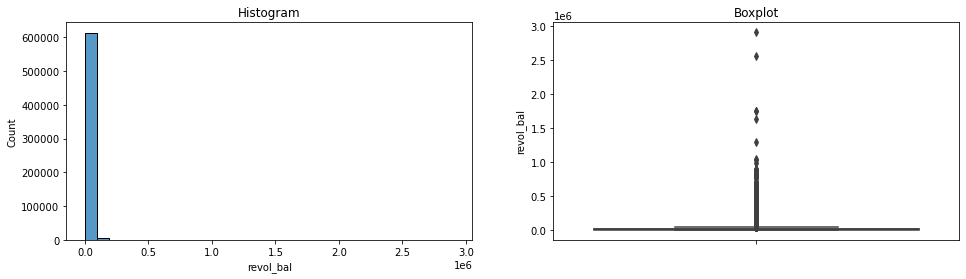

In [42]:
diagnostic_plots(train_num,'revol_bal')

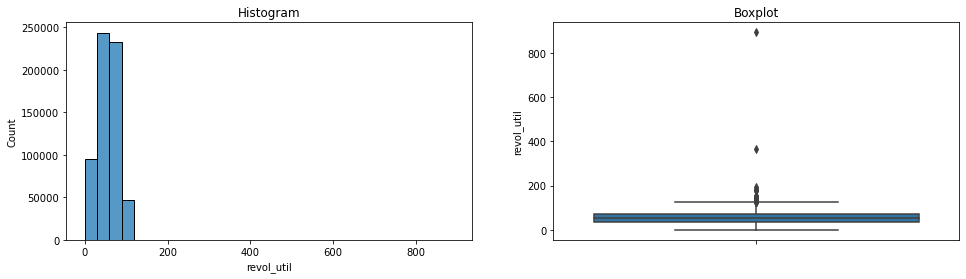

In [44]:
diagnostic_plots(train_num,'revol_util')

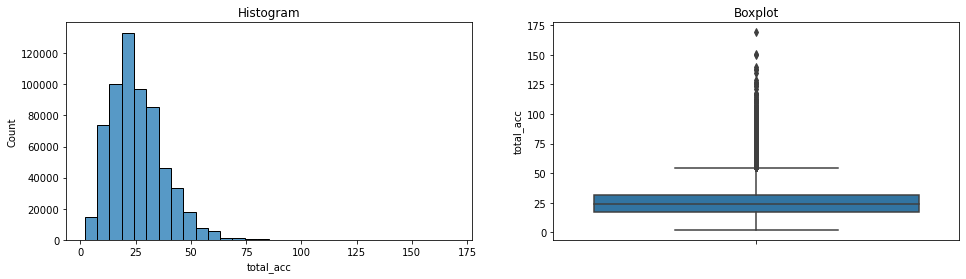

In [45]:
diagnostic_plots(train_num,'total_acc')

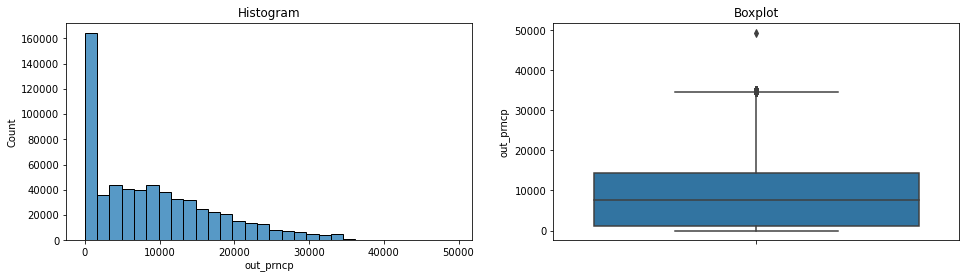

In [46]:
diagnostic_plots(train_num,'out_prncp')

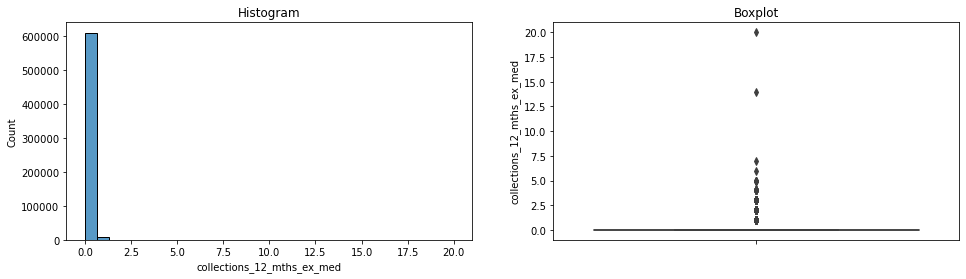

In [47]:
diagnostic_plots(train_num,'collections_12_mths_ex_med')

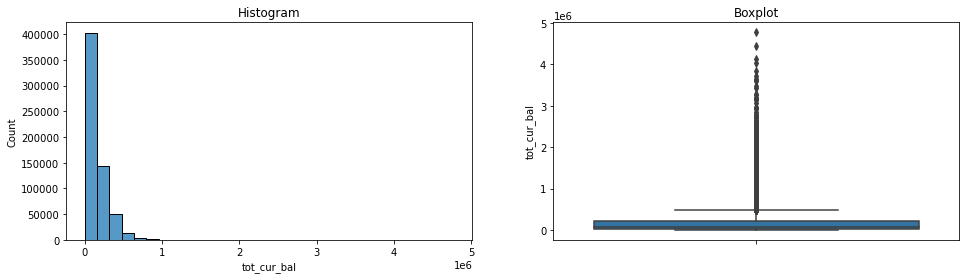

In [48]:
diagnostic_plots(train_num,'tot_cur_bal')

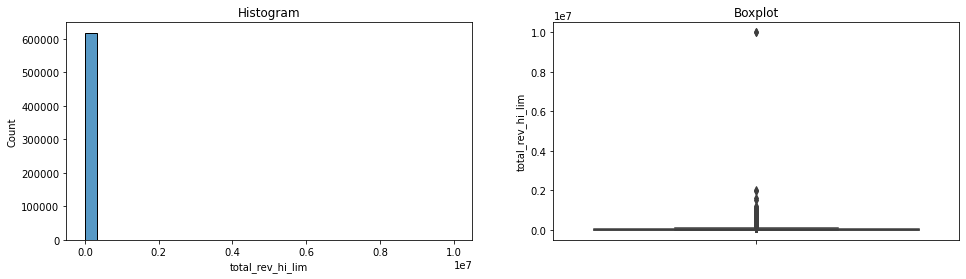

In [49]:
diagnostic_plots(train_num,'total_rev_hi_lim')

In [50]:
train_num.skew()

loan_amnt                      0.643895
int_rate                       0.433534
installment                    0.919311
annual_inc                    48.949772
dti                            0.365161
delinq_2yrs                    5.372313
inq_last_6mths                 1.710474
open_acc                       1.262589
pub_rec                       15.113280
revol_bal                     15.865427
revol_util                    -0.088815
total_acc                      0.901243
out_prncp                      0.829536
collections_12_mths_ex_med    16.180671
tot_cur_bal                    2.779996
total_rev_hi_lim              66.999945
dtype: float64

In [57]:
# Handling outlier with censoring method.
windsoriser = Winsorizer(capping_method='iqr',
                          tail='both', 
                          fold=3,
                          variables=['int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'collections_12_mths_ex_med', 'tot_cur_bal', 'total_rev_hi_lim'])

windsoriser.fit(train_num)

train_win = windsoriser.transform(train_num)
test_win = windsoriser.transform(test_num)

In [61]:
#Scaling

scaler = MinMaxScaler()
scaler.fit(train_win)

train_num_scaled = scaler.transform(train_win)
test_num_scaled = scaler.transform(test_win)

**Combining the numerical and categorical columns**

In [68]:
train_num_scaled1 = pd.DataFrame(train_num_scaled,columns=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'collections_12_mths_ex_med', 'tot_cur_bal', 'total_rev_hi_lim'])
test_num_scaled1 = pd.DataFrame(test_num_scaled,columns=['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'collections_12_mths_ex_med', 'tot_cur_bal', 'total_rev_hi_lim'])
train_enc1 = pd.DataFrame(train_enc, columns=['grade','emp_length','home_ownership', 'verification_status', 'purpose'])
test_enc1 = pd.DataFrame(test_enc, columns=['grade','emp_length','home_ownership', 'verification_status', 'purpose'])

In [73]:
train_fin_df = pd.concat([train_enc1,train_num_scaled1],axis=1)
test_fin_df = pd.concat([test_enc1,test_num_scaled1],axis=1)
train_fin_df.shape

(619173, 21)

## PCA

**checking to see how many should we reduce the features to**

In [79]:
pca = PCA(n_components = 21).fit(train_fin_df)
pca.explained_variance_ratio_

array([6.92789110e-01, 1.40657136e-01, 8.99101008e-02, 3.43737166e-02,
       2.25668653e-02, 7.36983369e-03, 3.07178239e-03, 2.35296444e-03,
       1.65638743e-03, 1.49108369e-03, 1.07513107e-03, 8.25863222e-04,
       7.09989392e-04, 4.62276442e-04, 3.40079746e-04, 1.34401977e-04,
       1.22608755e-04, 9.06686800e-05, 1.17070713e-35, 1.03420259e-37,
       6.50613244e-69])

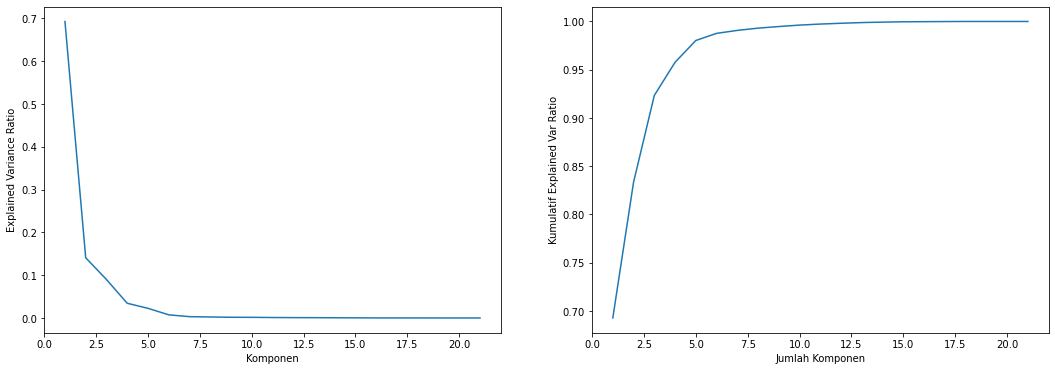

In [80]:
fig,ax=plt.subplots(ncols=2, figsize=(18, 6))
ax[0].plot(range(1,22), pca.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,22), np.cumsum(pca.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

In [87]:
#inserting the optimal reduction
pca = PCA(n_components=0.98)
df_pca = pca.fit_transform(train_fin_df)

In [88]:
pca.explained_variance_

array([13.45785417,  2.7323513 ,  1.74655895,  0.66773057,  0.43837523])